# Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Loading the data

In [ ]:
# Load the MNIST dataset and preprocess it
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0
Y_train = Y_train.astype('int32')
Y_test = Y_test.astype('int32')

# Split the dataset (X_train & Y_train) into training and validation sets
# Validation Split (should be 10% of X_train)
X_valid = X_train[:6000]
Y_valid = Y_train[:6000]
X_train = X_train[6000:]
Y_train = Y_train[6000:]

11490434/11490434 [==============================] - 0s 0us/step


Display a random sample from the dataset

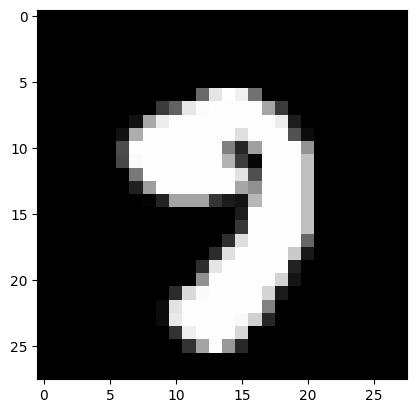

In [ ]:
# Visualize a sample from X_train (Keep in mind the images are stored as 1x784 and need to be converted to 28x28 in order to display) using a matplotlib heatmap
image = X_train[100].reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.show()

# MODEL

In [ ]:
i = 784 # Input size (no. of pixels = 28*28 = 784)
h1 = 100# Choose a reasonable no. of nodes for 1st hidden layer
h2 = 80# Choose a reasonable no. of nodes for 2nd hidden layer
o = 10 # Output size (no. of digits to classify)
lr = 0.001# Choose a reasonable learning rate
epochs = 10# Choose a reasonable no. of epochs

# Initialize the weights and biases (Generally, we follow the convention that weights are drawn from a standard normal distribution, while the bias vectors are initialized to zero.)

# Initialize W1 W2 W3
W1 = np.random.randn(i,h1)
W2 = np.random.randn(h1,h2)
W3 = np.random.randn(h2,o)

# Initialize b1 b2 b3
b1 = np.zeros((1,h1))
b2 = np.zeros((1,h2))
b3 = np.zeros((1,o))

# Defining Activation Functions

def sigmoid(z) :
  sigma = 1/(1+np.exp(-z))
  return sigma
    # Returns sigmoid of z
def sigmoidprime(z) :
    # Returns derivative of sigmoid function of z
    s = sigmoid(z)
    return s * (1 - s)

def one_hot(y,bs) :
    one_hot_val = np.zeros((bs,10))
    one_hot_val[np.arange(bs),y] = 1
    return one_hot_val

# Before we start with the training loop. Lets create 2 empty lists to store the cost and accuracy values at the end of each epoch
cost_array = []
accuracy_array = []

# forward propagation function
def forward_prop(X, W1, b1, W2, b2, W3, b3):
    z1 = np.dot(X,W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1,W2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2,W3) + b3
    y_pred = sigmoid(z3)
    return z1,a1,z2,a2,z3,y_pred

# backward propagation function
def backward_prop(X, Y, W1, b1, W2, b2, W3, b3, z1, a1, z2, a2, z3, y_pred):
    y_one_hot = one_hot(Y, 1)
    del3 = y_pred - y_one_hot
    W2_transpose = W2.T
    W3_transpose = W3.T
    del2 = np.dot(del3, W3_transpose)*sigmoidprime(z2)
    del1 = np.dot(del2, W2_transpose)*sigmoidprime(z1)

    W1 = W1 - lr * np.dot(X.reshape(-1,1),del1)
    b1 = b1 - lr * del1
    W2 = W2 - lr * np.dot(a1.reshape(-1,1),del2)
    b2 = b2 - lr * del2
    W3 = W3 - lr * np.dot(a2.reshape(-1,1),del3)
    b3 = b3 - lr * del3
    return W1,b1,W2,b2,W3,b3

# for calculation of accuracy
def calculate_acc(X, Y, W1, b1, W2, b2, W3, b3):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W3) + b3
    y_pred = sigmoid(z3)

    correct_val = np.argmax(y_pred, axis=1) == Y
    correct = np.sum(correct_val)
    accuracy = correct/len(Y)
    return accuracy


for ep in range(epochs):
    for i in range(len(X_train)):

        # Carry out the forward propagation matrices calculations for z1, a1, z2, a2, z3 and y_predicted
        z1, a1, z2, a2, z3, y_pred = forward_prop(X_train[i], W1, b1, W2, b2, W3, b3)
        # Convert the label of current iteration (Y_train[i]) to one hot encoded vector
        y_one_hot = one_hot(Y_train[i],1)
        # Calulate the cost as per your choice of loss function
        cost = np.sum((y_pred-y_one_hot)**2)
        # You can append this loss function value to the cost values list at every 200 iterations or so
        if i%200 == 0:
            cost_array.append(cost)
        # Carry out the back propagation matrices calculations
        # Update the values of W1 W2 W3 b1 b2 b3 as per the backpropagation values
        W1, b1, W2, b2, W3, b3 = backward_prop(X_train[i], Y_train[i], W1, b1, W2, b2, W3, b3, z1, a1, z2, a2, z3, y_pred)

        # End of loop (i)

    # Carry out forward propagation for the validation set
    z1_valid, a1_valid, z2_valid, a2_valid, z3_valid, y_valid_pred = forward_prop(X_valid, W1, b1, W2, b2, W3, b3)

    # Find the accuracy by comparing the model output on validation set with validation set labels
    accuracy = calculate_acc(X_valid, Y_valid, W1, b1, W2, b2, W3, b3)

    # You can print this accuracy to see your model's performance at the end of each epoch
    print(f"Accuracy:{accuracy}")
    # Append the accuracy values to the accuracy list
    accuracy_array.append(accuracy)

Accuracy:0.7156666666666667
Accuracy:0.7986666666666666
Accuracy:0.8331666666666667
Accuracy:0.8543333333333333
Accuracy:0.8685
Accuracy:0.8783333333333333
Accuracy:0.8873333333333333
Accuracy:0.8953333333333333
Accuracy:0.8983333333333333
Accuracy:0.9021666666666667


# Testing the model

In [ ]:
def classify(image):
    # Fill in this function to carry out forward propagation on input 'image' and return the predicted values of the trained model a$jbDfa%2
    z1 = np.dot(image,W1)+b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1,W2)+b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2,W3)+b3
    y_pred = sigmoid(z3)
    predicted_val = np.argmax(y_pred)
    return predicted_val

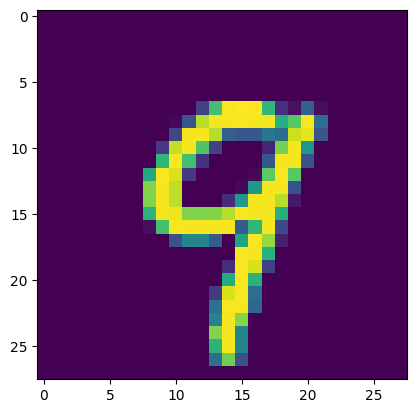

In [ ]:
# Display an image from the X_test set
image = X_test[12].reshape(1,-1)
# Display the model's output for this image utilizing the classify function
digit = classify(image)

image.reshape(28,28)
plt.imshow(X_test[12].reshape(28,28))

###If you're getting a good accuracy on your model (>85%) export the weights and bias matrices as numpy files, we'll need these later for custom dataset tests

In [ ]:
# Use np.save function to export the numpy arrays
np.save("W1.npy",W1)
np.save("b1.npy",b1)
np.save("W2.npy",W2)
np.save("b2.npy",b2)
np.save("W3.npy",W3)
np.save("b3.npy",b3)